# Titulo


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt

# ETL

Cargamos los datasets

In [29]:
df = pd.read_csv('../Datasets/Penetracion-hogares.csv')
df2 = pd.read_csv('../Datasets/Penetración-poblacion.csv')

df = pd.merge(df, df2, on=['Año', 'Trimestre', 'Provincia'])

Comprobamos si contiene datos nulos o duplicados

In [35]:
print("Total de observaciones: ", df.shape[0])
print("Total de nulos: ", df.isna().sum().sum())
print("Total de duplicados", df.duplicated().sum().sum())

df.describe()

Total de observaciones:  960
Total de nulos:  0
Total de duplicados 0


,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,960.000000,960.000000,960.000000,960.000000
mean,2018.500000,2.500000,51.662405,15.394079
std,2.873778,1.118617,23.898192,9.168959
min,2014.000000,1.000000,9.347208,2.684669
25%,2016.000000,1.750000,32.856870,8.764189
50%,2018.500000,2.500000,48.817167,13.417453
75%,2021.000000,3.250000,65.116858,19.657928
max,2023.000000,4.000000,124.061394,52.236739


Como no hay problema en el dataset, verificamos si hay outliers

<Axes: >

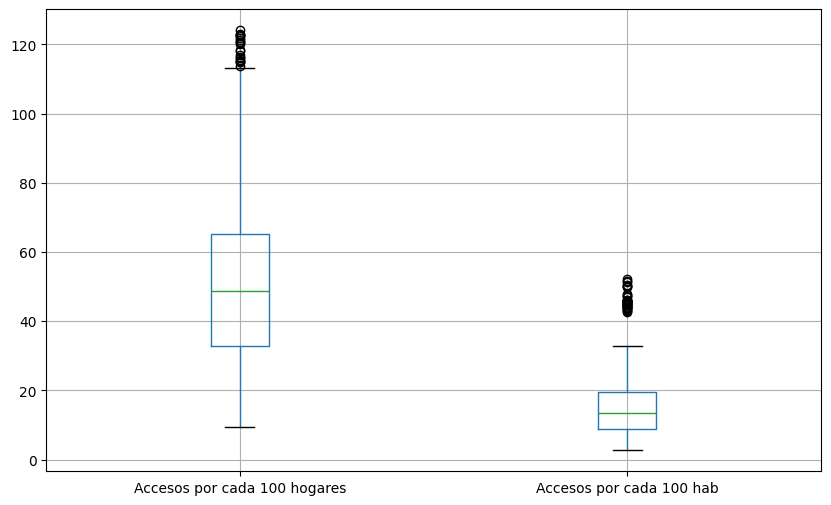

In [34]:
# Obtener outliers
plt.figure(figsize=(10, 6))
df.boxplot(column=['Accesos por cada 100 hogares', 'Accesos por cada 100 hab'])

Como hay outliers, nos encargamos de eliminarlos.

In [39]:
# Obtener outliers de accesos por cada 100 hab

q1 = df['Accesos por cada 100 hab'].quantile(0.25)
q3 = df['Accesos por cada 100 hab'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Accesos por cada 100 hab'] < lower_bound) | (df['Accesos por cada 100 hab'] > upper_bound)]

-920